In [2]:
#Preprocessing for neural network or other models - steps
#1 import dependencies 
#bring in data
#look for categorical fields that need to be made numeric
#Look at unique value counts for each field
#determine how to bin
#bin/bucket if needed
#create one_hot encoder instance
#fit the one_hot encoder
#use one hot encoder
#merge new fields back to original dataframe
#drop original fields that are now encoded

In [3]:
#Import dependencies
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from datetime import datetime

#display options
pd.set_option ('display.max_rows', 10)


In [4]:
#Set path of input file
file_path = "Resources/US_Salary_Cleaned.csv"
#Read input file into a DataFrame
salaries_df = pd.read_csv(file_path)
salaries_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,0,Mountain View,CA,USA
4,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,8.5,8.5,208000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,2018-09-09 11:52:00,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
44719,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,Redmond,WA,USA
44720,2018-09-13 14:35:00,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
44721,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [5]:
#inspect data to see which fields are strings that need to be converted to numeric
salaries_df.select_dtypes(include=['object']).columns


Index(['timestamp', 'company', 'title', 'gender', 'city', 'state', 'country'], dtype='object')

In [6]:
#convert timestamp to datetime format
salaries_df['timestamp']=pd.to_datetime(salaries_df['timestamp'])
#display options
pd.set_option ('display.max_rows', 10)
salaries_df


,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country
0,2017-06-07 11:33:00,Oracle,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,Redwood City,CA,USA
1,2017-06-10 17:11:00,eBay,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
3,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,0,Mountain View,CA,USA
4,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,8.5,8.5,208000,0.0,0.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,2018-09-09 11:52:00,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
44719,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,Redmond,WA,USA
44720,2018-09-13 14:35:00,MSFT,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,Seattle,WA,USA
44721,2018-09-16 16:10:00,Salesforce,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,San Francisco,CA,USA


In [7]:
# Determine the number of unique values in each column.
pd.set_option ('display.max_rows', None)
salaries_df.nunique()
#Fields that need bucketing: company, title, city, state, country

timestamp                  43589
company                     1429
title                         15
totalyearlycompensation      411
yearsofexperience             62
yearsatcompany                79
basesalary                   282
stockgrantvalue              218
bonus                        139
gender                         4
cityid                       704
dmaid                        148
rowNumber                  44723
Masters_Degree                 2
Bachelors_Degree               2
Doctorate_Degree               2
Highschool                     2
Some_College                   2
Race_Asian                     2
Race_White                     2
Race_Two_Or_More               2
Race_Black                     2
Race_Hispanic                  2
city                         642
state                         49
country                        1
dtype: int64

In [8]:
#Check company field to see how to bucket it
#display options
pd.set_option ('display.max_rows', None)
# Print out the company value counts
company_counts = salaries_df.company.value_counts()
print(company_counts)

Amazon                                     5429
Microsoft                                  4195
Google                                     2954
Facebook                                   1761
Apple                                      1558
Oracle                                      800
Intel                                       786
Salesforce                                  769
Capital One                                 748
Cisco                                       705
IBM                                         665
VMware                                      503
Qualcomm                                    499
Uber                                        472
LinkedIn                                    437
Bloomberg                                   426
JPMorgan Chase                              404
Intuit                                      377
Deloitte                                    331
PayPal                                      327
Adobe                                   

<AxesSubplot:ylabel='Density'>

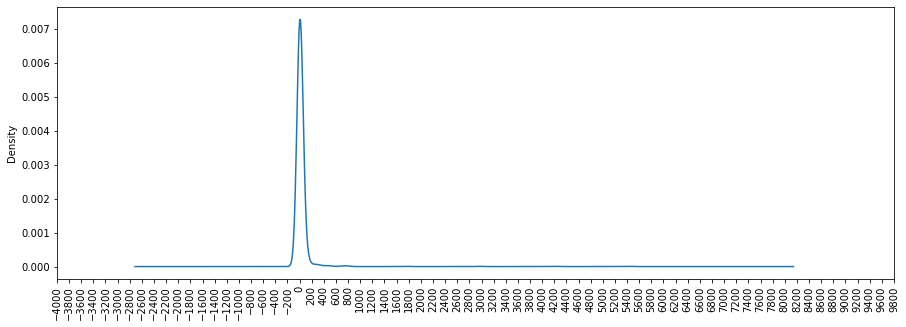

In [9]:
#Visualize the company value counts with a density plot
x_ticks = np.arange(-4000,10000,200)
company_counts.plot.density(xticks=x_ticks, figsize = (15,5), rot = 90)

In [10]:
#Density seems to drop off between 100 and 200 maybe, hard to see
#But this would produce too many buckets
#So bucket all <850 as other

#Determine which values to replace
replace_companies = list(company_counts[company_counts<850].index)

#Replace in DataFrame
for company in replace_companies:
    salaries_df.company = salaries_df.company.replace(company, "Other")

#Check to make sure binning was successful
salaries_df.company.value_counts()

Other        28826
Amazon        5429
Microsoft     4195
Google        2954
Facebook      1761
Apple         1558
Name: company, dtype: int64

In [11]:
#Check title field to see how to bucket it
#display options
pd.set_option ('display.max_rows', None)
# Print out the company value counts
title_counts = salaries_df.title.value_counts()
print(title_counts)

Software Engineer               29776
Product Manager                  3266
Data Scientist                   1980
Hardware Engineer                1759
Software Engineering Manager     1556
Product Designer                 1224
Technical Program Manager        1088
Management Consultant             748
Solution Architect                730
Business Analyst                  722
Marketing                         573
Mechanical Engineer               438
Recruiter                         391
Human Resources                   283
Sales                             189
Name: title, dtype: int64


<AxesSubplot:ylabel='Density'>

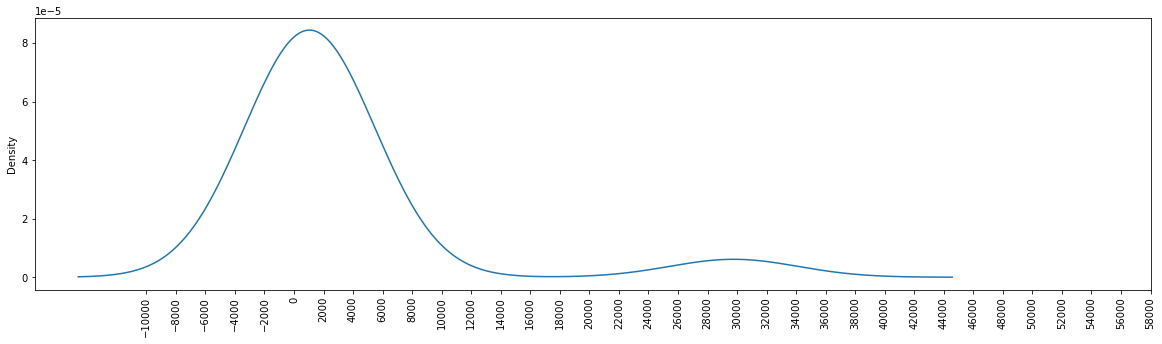

In [12]:
#Visualize the title value counts with a density plot
x_ticks = np.arange(-10000,60000,2000)
title_counts.plot.density(xticks=x_ticks, figsize = (20,5),rot = 90)

In [13]:
#values begine to fall off between 2000 and 4000. Bucket all under 2000

#Determine which values to replace
replace_title = list(title_counts[title_counts<1000].index)

#Replace in DataFrame
for title in replace_title:
    salaries_df.title = salaries_df.title.replace(title, "Other")

#Check to make sure binning was successful
salaries_df.title.value_counts()

Software Engineer               29776
Other                            4074
Product Manager                  3266
Data Scientist                   1980
Hardware Engineer                1759
Software Engineering Manager     1556
Product Designer                 1224
Technical Program Manager        1088
Name: title, dtype: int64

In [15]:
#Check city field to see how to bucket it
#display options
pd.set_option ('display.max_rows', None)
# Print out the city value counts
city_counts = salaries_df.city.value_counts()
print(city_counts)

Seattle                    6945
San Francisco              5146
New York                   3798
Redmond                    2455
Sunnyvale                  1823
San Jose                   1793
Mountain View              1791
Austin                     1437
Cupertino                  1152
Boston                     1083
Santa Clara                1061
Palo Alto                   959
Menlo Park                  913
San Diego                   796
Chicago                     715
Bellevue                    668
Los Angeles                 591
Washington                  550
Atlanta                     509
Dallas                      454
Redwood City                399
Portland                    318
Denver                      283
Irvine                      235
Pleasanton                  230
Cambridge                   222
Houston                     221
Arlington                   218
Hillsboro                   218
Plano                       208
Minneapolis                 207
Raleigh 

<AxesSubplot:ylabel='Density'>

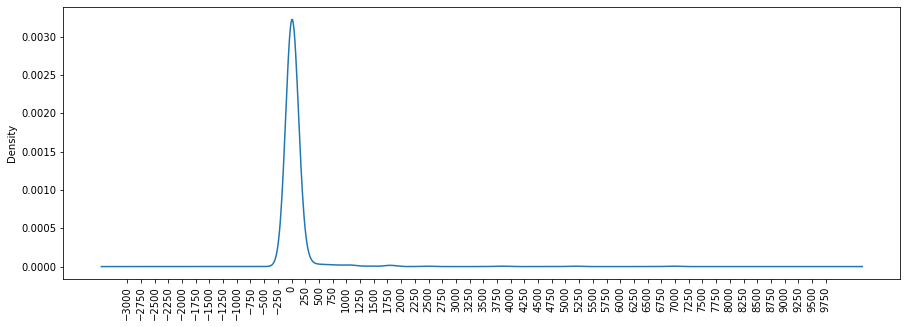

In [18]:
#Visualize the city value counts with a density plot
x_ticks = np.arange(-3000,10000,250)
city_counts.plot.density(xticks=x_ticks, figsize = (15,5),rot = 90)

In [14]:
#Check state field to see how to bucket it
#display options
pd.set_option ('display.max_rows', None)
# Print out the city value counts
state_counts = salaries_df.state.value_counts()
print(state_counts)

CA    18260
WA    10291
NY     3947
TX     2570
MA     1598
VA      860
IL      792
OR      592
DC      548
GA      548
CO      540
NC      481
PA      464
NJ      433
AZ      363
FL      292
MN      269
UT      214
MI      213
OH      197
MO      185
WI      154
CT      104
MD      104
IN       97
AR       88
TN       79
DE       58
ID       44
KS       37
NH       35
IA       31
LA       30
NE       25
AL       25
KY       23
NV       23
SC       22
OK       18
RI       18
WV       11
NM       10
VT        7
MT        6
ND        5
ME        4
HI        4
MS        3
WY        1
Name: state, dtype: int64


<AxesSubplot:ylabel='Density'>

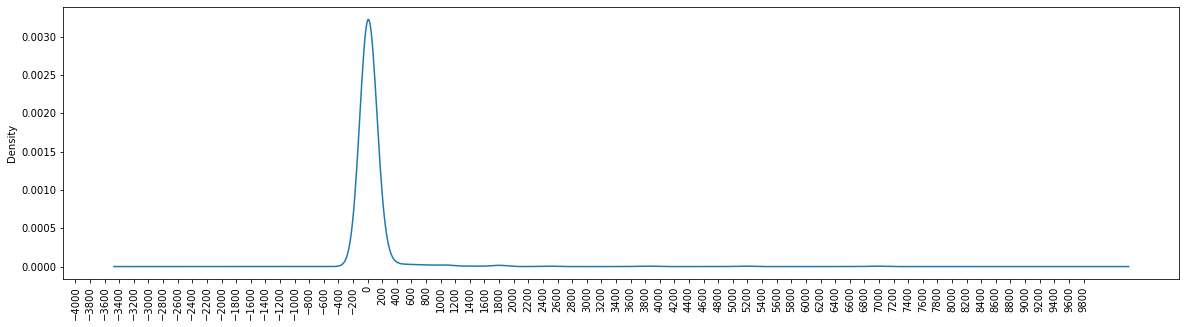

In [15]:
#Visualize the city value counts with a density plot
x_ticks = np.arange(-4000,10000,200)
city_counts.plot.density(xticks=x_ticks, figsize = (20,5), rot = 90)

In [16]:
#I think we should use regional bucketing for our first pass. The 3 location fields just have so many values that
#doing anything else results in uneven buckets or way too many buckets
#US census bureau defines 9 divisions, which is a good number of buckets
#see this url: https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
#create regional arrays

salaries_df['region'] = ''

#Create a function to define a region value for each row
def define_region(state):
    new_england = ['ME','CT','NH','VT','RI','MA']
    mid_atlantic = ['NJ','NY','PA']
    east_north_central =['IN','IL','MI','OH','WI']
    west_north_central = ['IA','KS','MN','MO','NE','ND','SD']
    south_atlantic = ['DE','DC','FL','GA','MD','NC','SC','VA','WV']
    east_south_central = ['AL','KY','MS','TN']
    west_south_central = ['AR','LA','OK','TX']
    mountain = ['AZ','CO','ID','NM','MT','UT','NV','WY']
    pacific = ['AK','CA','HI','OR','WA']
    region = ''
    if state in new_england:
        region = 1
    elif state in mid_atlantic:
        region = 2
    elif state in east_north_central:
        region = 3
    elif state in west_north_central:
        region = 4
    elif state in south_atlantic:
        region = 5
    elif state in east_south_central:
        region = 6
    elif state in west_south_central:
        region = 7
    elif state in mountain:
        region = 8
    elif state in pacific:
        region = 9
    else:
        region = 100
        
    return region
    

salaries_df['region'] = salaries_df['state'].apply(define_region)
salaries_df.head()

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,city,state,country,region
0,2017-06-07 11:33:00,Other,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,Redwood City,CA,USA,9
1,2017-06-10 17:11:00,Other,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,San Francisco,CA,USA,9
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,9
3,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,Mountain View,CA,USA,9
4,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,8.5,8.5,208000,0.0,0.0,none,...,0,0,0,0,0,0,Seattle,WA,USA,9


In [17]:
salaries_df['region'].value_counts()
#no one went into category 100, so all the rows had valid state values

9    29147
2     4844
5     2924
7     2706
1     1766
3     1453
8     1201
4      552
6      130
Name: region, dtype: int64

In [18]:
#Drop extra location columns prior to one_hot encoding
salaries_df = salaries_df.drop(columns=['city','state','country'])
pd.set_option ('display.max_rows', 10)
salaries_df

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,region
0,2017-06-07 11:33:00,Other,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,0,0,9
1,2017-06-10 17:11:00,Other,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,9
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,9
3,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,9
4,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,8.5,8.5,208000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,2018-09-09 11:52:00,Google,Software Engineer,327000,10.0,1.0,155000,150000.0,22000.0,none,...,0,0,0,0,0,0,0,0,0,9
44719,2018-09-13 08:23:00,Microsoft,Software Engineer,237000,2.0,2.0,146900,73200.0,16000.0,none,...,0,0,0,0,0,0,0,0,0,9
44720,2018-09-13 14:35:00,Other,Software Engineer,220000,14.0,12.0,157000,25000.0,20000.0,none,...,0,0,0,0,0,0,0,0,0,9
44721,2018-09-16 16:10:00,Other,Software Engineer,280000,8.0,4.0,194688,57000.0,29000.0,none,...,0,0,0,0,0,0,0,0,0,9


In [19]:
salaries_df['basesalary'].describe().apply(lambda x: format(x, '.2f'))

count     44723.00
mean     143719.73
std       34686.54
min       28000.00
25%      120000.00
50%      143000.00
75%      165000.00
max      247000.00
Name: basesalary, dtype: object

In [20]:
#create a target value from the base salary by bucketing
#The mean is 143,719, the standard deviation is 34687

In [21]:
#Make salary bands of 25000 
#Create a function to calculate salary level and apply to column
def salary_buckets(salary):
    max_level_threshold = 250000
    band_size = 25000
    max_bucket = int(max_level_threshold/band_size)
    if salary < max_level_threshold:
        salary_level = int(salary / band_size)
    else:
        salary_level = max_bucket
    return salary_level

In [22]:
salaries_df['salary_level'] = salaries_df['basesalary'].apply(salary_buckets)
salaries_df.head()

,timestamp,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,region,salary_level
0,2017-06-07 11:33:00,Other,Product Manager,127000,1.5,1.5,107000,20000.0,10000.0,none,...,0,0,0,0,0,0,0,0,9,4
1,2017-06-10 17:11:00,Other,Software Engineer,100000,5.0,3.0,100000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,9,4
2,2017-06-11 14:53:00,Amazon,Product Manager,310000,8.0,0.0,155000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,9,6
3,2017-06-20 10:58:00,Microsoft,Software Engineer,157000,5.0,3.0,157000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,9,6
4,2017-06-21 17:27:00,Microsoft,Software Engineer,208000,8.5,8.5,208000,0.0,0.0,none,...,0,0,0,0,0,0,0,0,9,8


In [23]:
pd.set_option ('display.max_rows', 20)
print(salaries_df['salary_level'].value_counts())

5    12015
6    11177
4     8828
7     5472
3     3262
8     2485
2      762
9      661
1       61
Name: salary_level, dtype: int64


array([[<AxesSubplot:title={'center':'salary_level'}>]], dtype=object)

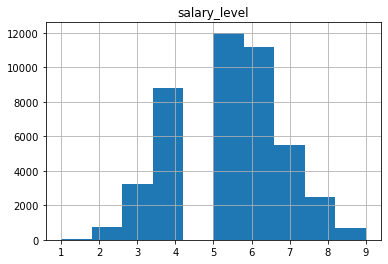

In [24]:
#Look at the distribution of salary level
salaries_df.hist(column = ["salary_level"])

In [25]:
# Generate our categorical variable lists
salaries_cat = salaries_df.dtypes[salaries_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
salaries_df[salaries_cat].nunique()

company    6
title      8
gender     4
dtype: int64

In [26]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(salaries_df[salaries_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(salaries_cat)
encode_df.head()

C:\Users\mgsri\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,company_Amazon,company_Apple,company_Facebook,company_Google,company_Microsoft,company_Other,title_Data Scientist,title_Hardware Engineer,title_Other,title_Product Designer,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,title_Technical Program Manager,gender_Female,gender_Male,gender_Other,gender_none
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
# Merge one-hot encoded features and drop the originals
salaries_df = salaries_df.merge(encode_df,left_index=True, right_index=True)
salaries_df = salaries_df.drop(salaries_cat,1)
salaries_df.head()

C:\Users\mgsri\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,timestamp,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,...,title_Other,title_Product Designer,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,title_Technical Program Manager,gender_Female,gender_Male,gender_Other,gender_none
0,2017-06-07 11:33:00,127000,1.5,1.5,107000,20000.0,10000.0,7392,807.0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2017-06-10 17:11:00,100000,5.0,3.0,100000,0.0,0.0,7419,807.0,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2017-06-11 14:53:00,310000,8.0,0.0,155000,0.0,0.0,11527,819.0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2017-06-20 10:58:00,157000,5.0,3.0,157000,0.0,0.0,7322,807.0,9,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2017-06-21 17:27:00,208000,8.5,8.5,208000,0.0,0.0,11527,819.0,11,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
#Make sure we got all the columns, don't see region or salary level
salaries_df.columns.tolist()

['timestamp',
 'totalyearlycompensation',
 'yearsofexperience',
 'yearsatcompany',
 'basesalary',
 'stockgrantvalue',
 'bonus',
 'cityid',
 'dmaid',
 'rowNumber',
 'Masters_Degree',
 'Bachelors_Degree',
 'Doctorate_Degree',
 'Highschool',
 'Some_College',
 'Race_Asian',
 'Race_White',
 'Race_Two_Or_More',
 'Race_Black',
 'Race_Hispanic',
 'region',
 'salary_level',
 'company_Amazon',
 'company_Apple',
 'company_Facebook',
 'company_Google',
 'company_Microsoft',
 'company_Other',
 'title_Data Scientist',
 'title_Hardware Engineer',
 'title_Other',
 'title_Product Designer',
 'title_Product Manager',
 'title_Software Engineer',
 'title_Software Engineering Manager',
 'title_Technical Program Manager',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'gender_none']

In [29]:
#Remove salary colummns from data since we have encoded it as salary_level
salaries_df = salaries_df.drop(columns=['totalyearlycompensation','basesalary','bonus','stockgrantvalue'])
salaries_df

,timestamp,yearsofexperience,yearsatcompany,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,...,title_Other,title_Product Designer,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,title_Technical Program Manager,gender_Female,gender_Male,gender_Other,gender_none
0,2017-06-07 11:33:00,1.5,1.5,7392,807.0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2017-06-10 17:11:00,5.0,3.0,7419,807.0,2,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2017-06-11 14:53:00,8.0,0.0,11527,819.0,3,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2017-06-20 10:58:00,5.0,3.0,7322,807.0,9,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2017-06-21 17:27:00,8.5,8.5,11527,819.0,11,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,2018-09-09 11:52:00,10.0,1.0,11527,819.0,1973,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
44719,2018-09-13 08:23:00,2.0,2.0,11521,819.0,2037,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
44720,2018-09-13 14:35:00,14.0,12.0,11527,819.0,2044,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
44721,2018-09-16 16:10:00,8.0,4.0,7419,807.0,2097,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
#think about what other files ought to be dropped if we are making this into a model where a user enters
#some data. They won't know their city id or dmaid, and those columns encode location which we have already
#done in our region field
#rowNumber should go too, and timestamp, unless we want to make the user enter a data, which might be ok?
#for now, leave timestamp and see if it works with the neural network functions - timestamp bombs standard scaler so drop it

In [31]:
salaries_df = salaries_df.drop(columns=['dmaid','cityid','rowNumber','timestamp'])
salaries_df

,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,...,title_Other,title_Product Designer,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,title_Technical Program Manager,gender_Female,gender_Male,gender_Other,gender_none
0,1.5,1.5,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5.0,3.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,8.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5.0,3.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8.5,8.5,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,10.0,1.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
44719,2.0,2.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
44720,14.0,12.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
44721,8.0,4.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
#write preprocessed data to output file
salaries_df.to_csv("Resources/US_Salary_Preprocessed.csv",index=False)

In [33]:
#Next part must be done in Google colab because of my laptop's inability to run tensorflow